# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

In [4]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

In [5]:
lasso = Lasso().fit(X_train, y_train)

In [6]:
ridge = Ridge().fit(X_train, y_train)

Количество коэффициентов близких к 0 (Lasso):  10
Количество коэффициентов близких к 0 (Ridge):  10


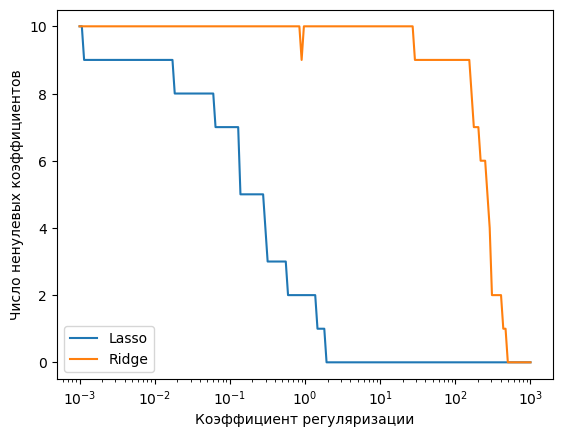

In [21]:
num_zero_coef_lasso = np.sum(np.abs(lasso.coef_) < 1e-2)
print("Количество коэффициентов близких к 0 (Lasso): ", num_zero_coef_lasso)

num_zero_coef_ridge = np.sum(np.abs(ridge.coef_) < 1)
print("Количество коэффициентов близких к 0 (Ridge): ", num_zero_coef_ridge)

alphas = np.logspace(-3, 3, num = 200)

num_nonzero_coef_lasso = []
num_nonzero_coef_ridge = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    num_nonzero_coef_lasso.append(np.sum(np.abs(lasso.coef_) >= 1e-2))
    num_nonzero_coef_ridge.append(np.sum(np.abs(ridge.coef_) >= 1))

plt.plot(alphas, num_nonzero_coef_lasso, label="Lasso")
plt.plot(alphas, num_nonzero_coef_ridge, label="Ridge")
plt.xscale("log")
plt.xlabel("Коэффициент регуляризации")
plt.ylabel("Число ненулевых коэффициентов")
plt.legend()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
y_pred = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("MAE :", mae)
print("R^2 :", r2)

RMSE : 72.80372459988021
MAE : 59.93205385058561
R^2 : 0.0019494157091123343


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

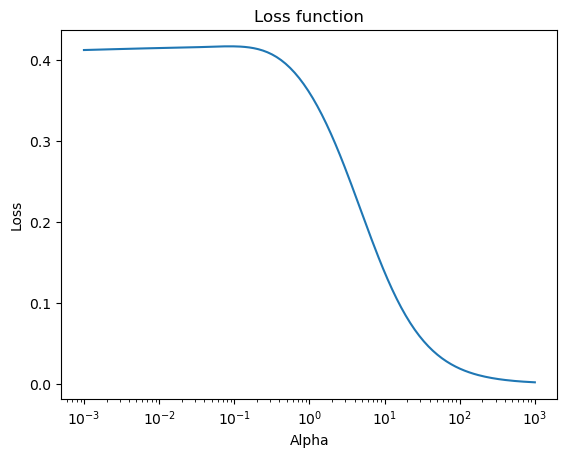

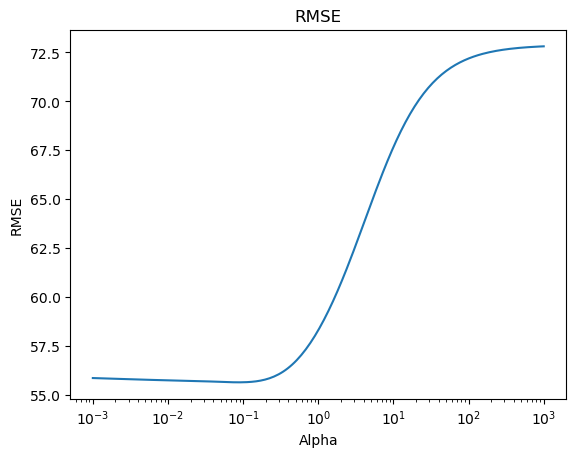

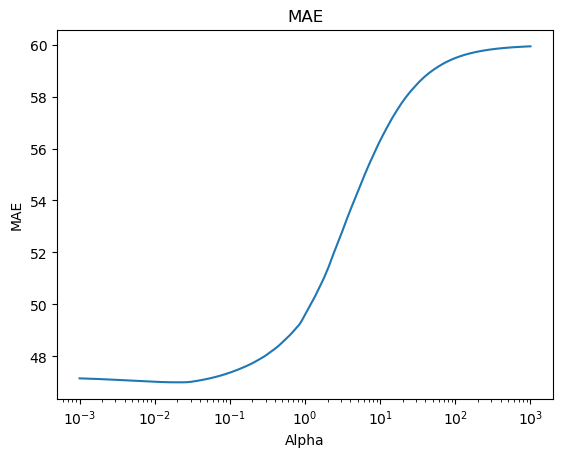

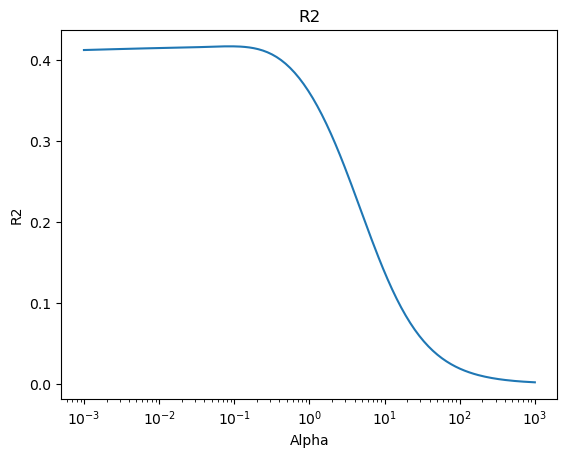

In [10]:
#Посчитайте те же метрики снова. Заметно ли изменилось качество? Не поняла что это значит... после чего они должны были измениться
#Построила так же график зависимости от коэффициента регуляризации
rmse_values = []
mae_values = []
r2_values = []
loss_values = []

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    
    rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_values.append(mean_absolute_error(y_test, y_pred))
    r2_values.append(r2_score(y_test, y_pred))

    loss = ridge.score(X_test, y_test)
    loss_values.append(loss)

plt.plot(alphas, loss_values)
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.title('Loss function')
plt.xscale('log')
plt.show()

plt.plot(alphas, rmse_values)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE')
plt.xscale('log')
plt.show()

plt.plot(alphas, mae_values)
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('MAE')
plt.xscale('log')
plt.show()

plt.plot(alphas, r2_values)
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('R2')
plt.xscale('log')
plt.show()

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

array([[<Axes: title={'center': '0'}>]], dtype=object)

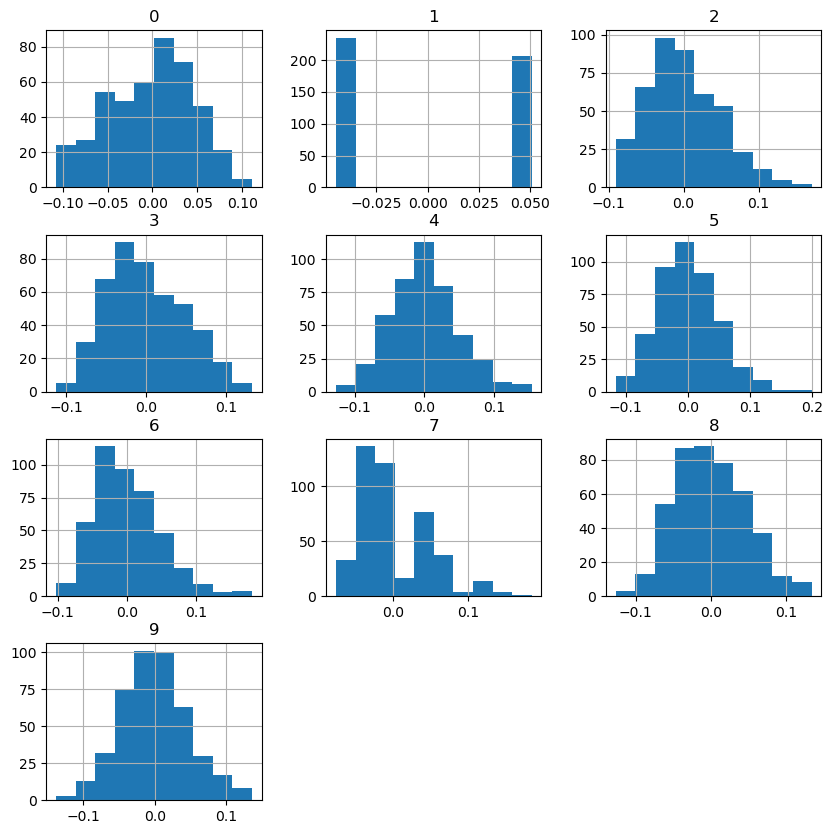

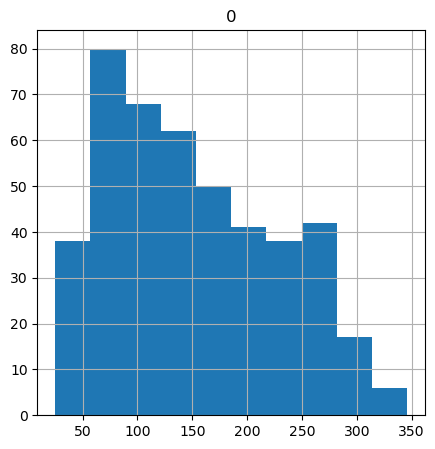

In [11]:
Data = pd.DataFrame(data.data)
Data2 = pd.DataFrame(data.target)
Data.hist(figsize = ( 10, 10))
Data2.hist(figsize = ( 5, 5))

In [12]:
a = [0] * 10
m = [0] * 10
m2 = [0] * 10
for i in range(0, len(data.data)):
    flag = True
    for j in range(0, 10):
        if abs(data.data[i][j]) > 0.1:
            a[j] += 1
        m[j] = min(m[j], data.data[i][j])
        m2[j] = max(m2[j], data.data[i][j])
print(a)
print(m)
print(m2)

[8, 0, 12, 12, 17, 17, 16, 19, 14, 17]
[-0.1072256316073538, -0.044641636506989144, -0.09027529589850945, -0.11239880254408448, -0.12678066991651324, -0.11561306597939897, -0.10230705051741597, -0.0763945037500033, -0.12609712083330468, -0.13776722569000302]
[0.11072667545381144, 0.05068011873981862, 0.17055522598064407, 0.13204361674121307, 0.15391371315651542, 0.19878798965729408, 0.18117906039727852, 0.18523444326019867, 0.13359728192191356, 0.13561183068907107]


Буду удалять объект, если:

1) Есть есть число >= 0.12 по модулю(слишком сильное отличие от 0.1)
2) Если есть число > 0.1 по модулю и это число не в колонках, где эти выбросы слишком часто

In [13]:
print(len(data.data))
X = []
y = []
for i in range(0, len(data.data)):
    flag = True
    for j in range(0, 10):
        if abs(data.data[i][j]) >= 0.12:
            flag = False
        if abs(data.data[i][j]) > 0.1 and a[j] <= 14:
            flag = False
    if flag:
        X.append(data.data[i])
        y.append(data.target[i])
print(len(X))
print(data.data[0])

442
369
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


Убрала 16.5% процентов данных, которыми я считаю выбросами

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=241)

In [15]:
ridge.set_params(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=1000.0)

In [16]:
y_pred = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("MAE :", mae)
print("R^2 :", r2)

RMSE : 63.76788570705401
MAE : 51.6131485923244
R^2 : 0.0009818983224959554


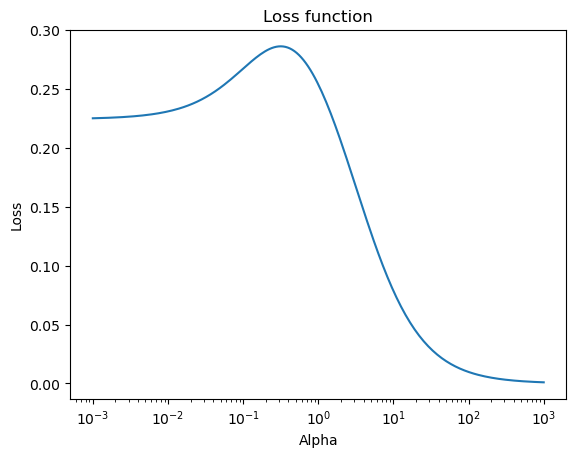

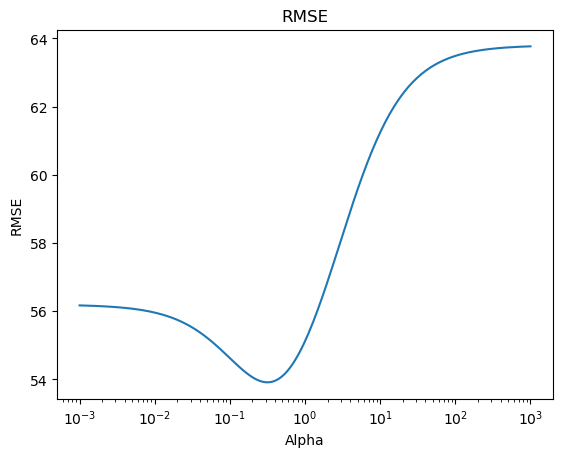

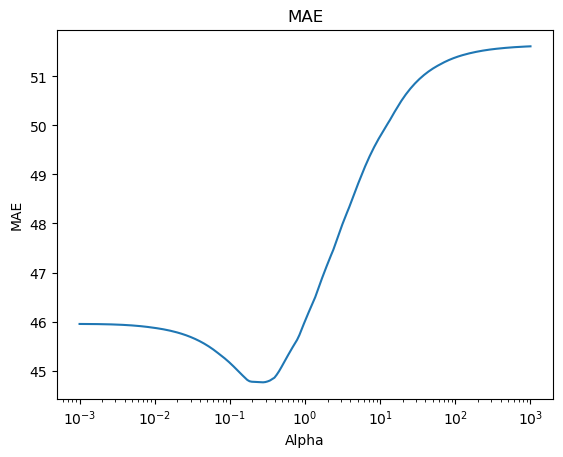

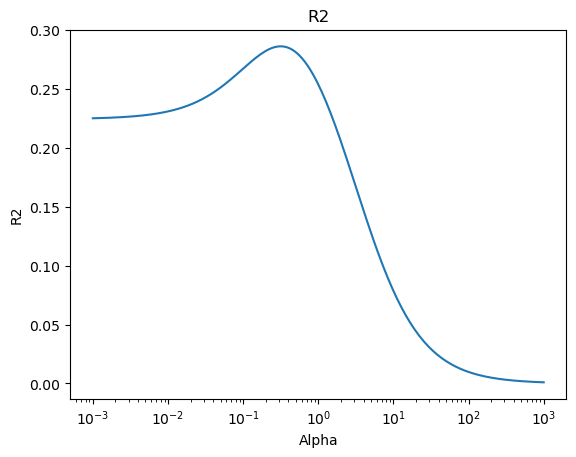

In [17]:
rmse_values = []
mae_values = []
r2_values = []
loss_values = []

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    
    rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_values.append(mean_absolute_error(y_test, y_pred))
    r2_values.append(r2_score(y_test, y_pred))

    loss = ridge.score(X_test, y_test)
    loss_values.append(loss)

plt.plot(alphas, loss_values)
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.title('Loss function')
plt.xscale('log')
plt.show()

plt.plot(alphas, rmse_values)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE')
plt.xscale('log')
plt.show()

plt.plot(alphas, mae_values)
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('MAE')
plt.xscale('log')
plt.show()

plt.plot(alphas, r2_values)
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('R2')
plt.xscale('log')
plt.show()

Стало чуть-чуть лучше. Так как удалились выбросы, которые сильно влияют на RMSE и MAE.

__Задание 3.__ Отчёт

**(2 балла)**

1)Выбросы удалять нужно, особенно когда метрика от этого очень сильно зависит.

2)Подход к разным метрикам немного разный и так же лучшие параметры могут быть разные